In [95]:
import os
ROOT_DIR = os.path.abspath(os.curdir)
print(ROOT_DIR)

/Users/mazeinsv/PycharmProjects/python.Neural.Market


In [96]:
# !pip install --upgrade pip
# !pip install pandas matplotlib statsmodels tensorflow sklearn xlwt

In [97]:
# !git clone https://github.com/keras-team/keras-tuner.git
# %cd keras-tuner
# !pip install .

In [98]:
# !pip uninstall tensorflow-gpu
# !pip install tensorflow-gpu

In [99]:
from urllib.parse import urlencode
from urllib.request import urlopen
import urllib.request
from datetime import datetime, timedelta
import statsmodels.api as sm


In [100]:
# Для работы с google диском
# from google.colab import drive
# drive.mount('/content/gdrive')
# import sys
# sys.path.append('/content/gdrive/My Drive/Python/Market/')
# data_path = '/content/gdrive/My Drive/Python/Market/Data/'

#Для работы локально на виртуальной машине
data_path = ROOT_DIR + '/data/'
if not os.path.exists(data_path):
	os.mkdir(data_path)

In [101]:
#periods = {'tick': 1, '1m': 2, '5m': 3, '10m': 4, '15m': 5, '30m': 6, 'H': 7, 'D': 8, 'W': 9, 'M': 10}
seccode = "S&P"
period = "D"
today = datetime.today().strftime('%Y-%m-%d')
print("today: " + today)
path_best_model = data_path + today + '_' + seccode + '_' + period + '_' + 'best.h5'

today: 2021-11-20


In [102]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

zsh:1: command not found: nvidia-smi


In [103]:
# ============================= Мoдуль извлечения котировок с сайта www.finam.ru ===================

FINAM_URL = "http://export.finam.ru/"  # сервер, на который стучимся
# каждому таймфрейму на Финаме соответствует цифровой код:
# periods = {'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10}
periods = {'tick': 1, '1m': 2, '5m': 3, '10m': 4, '15m': 5, '30m': 6, 'H': 7, 'D': 8, 'W': 9, 'M': 10}
# каждому символу Финам присвоил цифровой код:
symbols = {'S&P': 13944, 'USDRUB': 901, 'ED':83, 'GD':18953, 'MICEX': 420450, 'BZ': 19473, 'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001}

# Функция запрашивает котировки с сервера экспорта данных Финама по инструменту для заданного таймфрейма за последние
# period_days дней и возвращает соответствующий датафрейм
def GetCandles (ticker, time_frame, start_d):
    period=periods[time_frame] # Выбор из: 'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10
    market = 0  # можно не задавать. Это рынок, на котором торгуется бумага. Для акций работает с любой цифрой. Другие рынки не проверял.
    # Текущий момент времени
    end_date = datetime.today()
    print("end_date " + str(end_date))
    # Время period_days дней назад
    start_date = ToDate(start_d) #end_date - timedelta(days = period_days)
    # Все параметры упаковываем в единую структуру. Здесь есть дополнительные параметры, кроме тех, которые заданы в шапке. См. комментарии внизу:
    params = urlencode([
     ('market', market), # на каком рынке торгуется бумага
     ('em', symbols[ticker]), # вытягиваем цифровой символ, который соответствует бумаге.
     ('code', ticker), # тикер нашей акции
     ('df', start_date.day), # Начальная дата, номер дня (1-31)
     ('mf', start_date.month - 1), # Начальная дата, номер месяца (0-11)
     ('yf', start_date.year), # Начальная дата, год
     ('from', start_date), # Начальная дата полностью
     ('dt', end_date.day), # Конечная дата, номер дня
     ('mt', end_date.month - 1), # Конечная дата, номер месяца
     ('yt', end_date.year), # Конечная дата, год
     ('to', end_date), # Конечная дата
     ('p', period), # Таймфрейм
     ('f', ticker), # Имя сформированного файла
     ('e', ".csv"), # Расширение сформированного файла
     ('cn', ticker), # ещё раз тикер акции
     ('dtf', 1), # В каком формате брать даты. Выбор из 5 возможных. См. страницу https://www.finam.ru/profile/moex-akcii/sberbank/export/
     ('MSOR', 0), # Время свечи (0 - open; 1 - close)
     ('mstime', "on"), # Московское время
     ('mstimever', 1), # Коррекция часового пояса
     ('sep', 1), # Разделитель полей (1 - запятая, 2 - точка, 3 - точка с запятой, 4 - табуляция, 5 - пробел)
     ('sep2', 1), # Разделитель разрядов
     ('datf', 1), # Формат записи в файл. Выбор из 6 возможных.
     ('at', 1)]) # Нужны ли заголовки столбцов
    url = FINAM_URL + ticker + ".csv?" + params # собственно URL сформированного запроса
    # Создаем датафрейм candles с котировками
    print(url)
    # candles = pd.read_csv(url)

    req = urllib.request.Request(url, data=None, headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'})

    candles = pd.read_csv(urllib.request.urlopen(req))
    # candles.to_csv("Data/" + ticker + ".csv")

    # Добавляем в датафрейм столбец 'DT', который будет содержать время каждой свечи в формате datetime.
    # Формируем его из столбцов '<DATE>'и '<TIME>', их в последствие можете удалить
    candles['DT'] = list(map(lambda d, t: ToDatetime(d, t), candles['<DATE>'], candles['<TIME>']))
    # Возвращает Датафрейм Пандас со свечами, соответствующими запросу
    return candles


# Преобразует число (или строку) вида 20201030 и строку вида '12:15:00' в объект datetime.datetime(2020, 10, 30, 12, 15)
def ToDatetime (date_num, time_hhmmss):
    return datetime.strptime(str(date_num) + time_hhmmss, '%Y%m%d%H:%M:%S')


# Преобразует строку (или число) вида "20201102" в дату (формат datetime)
def ToDate (date_yyyymmdd):
    return datetime.strptime(str(date_yyyymmdd), '%Y%m%d').date()

# вызов micex=GetCandles ('MICEX', «15min», "20000101") вернет в переменную micex датафрейм, содержащий 15-ти
# минутные свечи индекса ММВБ с начала даты "20000101" до текущего момента времени.
# candles = GetCandles ("SBER", "daily", "20000101")
#
# print(candles.tail)
# candles.to_csv("SBER.csv")

In [104]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

# univariate multi-step encoder-decoder cnn-lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM,RepeatVector,TimeDistributed
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow import keras

import tensorflow as tf
print(tf.__version__)

2.7.0


In [105]:
def parser(x):
	return datetime.strptime(x, '%d.%m.%Y')
 

def split_dataset(data):
	print("data len {}".format(len(data)))
	shift = len(data) - step_forecast*(len(data)//step_forecast)
	print("start row {}".format(shift))

	train = data[(shift):(-(rows_to_test)-step_forecast)]
	std_train = data[(shift):(-(rows_to_test)-step_forecast)]
	test = data[(-(rows_to_test)-step_forecast):-step_forecast]
	all_history = data[(shift):]
	std_history = data[(shift):]

	# train = array(split(train, len(train)/step_forecast))
	# std_train = array(split(std_train, len(std_train)/step_forecast))
	# test = array(split(test, len(test)/step_forecast))
	# all_history = array(split(all_history,len(all_history)/step_forecast))
	# std_history = array(split(std_history,len(std_history)/step_forecast))
 
	return std_train, train, test , std_history , all_history


# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	list_actual = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)

		list_predict = predicted[:, i]  # [round(x) for x in predicted[:, i]]
		# print("Текущее:{}  Прогнозное:{} rmse:{}".format(actual[:, i], list_predict, round(rmse)))
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised_x(train_1, n_input, n_out):
	# flatten data
	data = train_1.reshape((train_1.shape[0]*train_1.shape[1], train_1.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X)
def to_supervised_y(train_2, n_input, n_out):
	# flatten data
	data = train_2.reshape((train_2.shape[0]*train_2.shape[1], train_2.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(y)

# train the model
def build_model(train_x,train_y, train, n_input):
	# prepare data
	# train_x, train_y = to_supervised(train, n_input, step_forecast)

	# train_y = to_supervised_y(train, n_input, step_forecast)
	# train_x = to_supervised_x(std_train, n_input, step_forecast)

	# print('train_x')
	# print(train_x)

	# print('train_y')
	# print(train_y)

	# define parameters

	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=128, kernel_size=3, activation='elu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='elu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(1024, activation='elu', return_sequences=True))
	model.add(TimeDistributed(Dense(544, activation='elu')))
	model.add(TimeDistributed(Dense(544, activation='elu')))
	model.add(TimeDistributed(Dense(544, activation='elu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network

	
	return model

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]

	input_x = input_x[0]
	# yhat_list = [round(x) for x in yhat]
	# print("Вход (input_x):{} Прогноз (yhat):{}".format(input_x[0], yhat))

	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores, model

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob


In [106]:
def parser_finam(x):
	return datetime.strptime(x, '%Y%m%d')
 
 # dataset = read_csv(data_path + 'Finam/' + 'SBER.txt', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser,sep=";", decimal=',')
# dataset = read_csv(data_path + 'Finam/' + 'SBER.txt', header=0, parse_dates=[2],  squeeze=True, date_parser=parser_finam,sep=";", decimal='.')

dataset = GetCandles (seccode, period, "20000101")

end_date 2021-11-20 18:20:54.180093
http://export.finam.ru/S&P.csv?market=0&em=13944&code=S%26P&df=1&mf=0&yf=2000&from=2000-01-01&dt=20&mt=10&yt=2021&to=2021-11-20+18%3A20%3A54.180093&p=8&f=S%26P&e=.csv&cn=S%26P&dtf=1&MSOR=0&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1


In [107]:
print(dataset.tail())

     <TICKER> <PER>    <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
5929      S&P     D  20211115  00:00:00  4681.50  4697.50  4667.00  4676.75   
5930      S&P     D  20211116  00:00:00  4676.75  4709.75  4670.75  4693.50   
5931      S&P     D  20211117  00:00:00  4693.75  4701.00  4679.25  4691.50   
5932      S&P     D  20211118  00:00:00  4691.75  4722.00  4668.00  4717.75   
5933      S&P     D  20211119  00:00:00  4717.75  4723.50  4684.25  4697.75   

        <VOL>         DT  
5929  1003360 2021-11-15  
5930   986375 2021-11-16  
5931  1019370 2021-11-17  
5932  1147513 2021-11-18  
5933  1221166 2021-11-19  


In [108]:
dataset = dataset.drop(['<TICKER>','<PER>','<TIME>','<VOL>'], 1)
dataset.rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN', '<HIGH>':'HIGH', '<LOW>':'LOW', '<CLOSE>':'CLOSE'}, inplace=True)
dataset = dataset[['DATE','CLOSE']]
dataset.set_index('DATE', inplace=True)
# dataset = dataset[['CLOSE']]

if seccode == "SBER":
	dataset.loc[:'2007-07-17'] /=1000 # Делим на 1000 все цены до указанного периода. По сберу была переоценка в лотах 


# dataset.loc['2007-07-16':'2007-07-20'].values.tolist()

print(dataset)

            CLOSE
DATE             
20030505   925.00
20030506   934.00
20030507   928.50
20030508   919.25
20030509   932.75
...           ...
20211115  4676.75
20211116  4693.50
20211117  4691.50
20211118  4717.75
20211119  4697.75

[5934 rows x 1 columns]


In [109]:
if seccode == "SBER":
  dataset = dataset.loc['2004-01-01':]
print(dataset.head())

           CLOSE
DATE            
20030505  925.00
20030506  934.00
20030507  928.50
20030508  919.25
20030509  932.75


In [110]:
data1diff = dataset.diff(periods=1).dropna()
print(data1diff)

          CLOSE
DATE           
20030506   9.00
20030507  -5.50
20030508  -9.25
20030509  13.50
20030510  -0.25
...         ...
20211115  -4.75
20211116  16.75
20211117  -2.00
20211118  26.25
20211119 -20.00

[5933 rows x 1 columns]


В коде выше функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода. Период смещения передается как параметр period. Т.к. в разности первое значение получиться неопределенным, то нам надо избавиться от него для этого и используется метод dropna().
Проверим получившийся ряд на стационарность:

In [111]:
# https://habr.com/ru/post/207160/
test = sm.tsa.adfuller(data1diff['CLOSE'])
# test = sm.tsa.adfuller(dataset['CLOSE'])
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -14.288599243372492
p-value:  1.2871099137174363e-26
Critical values:  {'1%': -3.4314588385367197, '5%': -2.8620300031826043, '10%': -2.5670308264579145}
единичных корней нет, ряд стационарен


In [112]:
print(dataset)

            CLOSE
DATE             
20030505   925.00
20030506   934.00
20030507   928.50
20030508   919.25
20030509   932.75
...           ...
20211115  4676.75
20211116  4693.50
20211117  4691.50
20211118  4717.75
20211119  4697.75

[5934 rows x 1 columns]


In [113]:
step_forecast =1
n_input = 6 # пакет прошлых данных, назад для прогноза, т.е. 6 все входные данне за прошлый период, что бы получить прогноз
rows_to_test = 12 # количесвтов месяцев для теста модели, кратно шагам прогноза (step_forecast), смотри след строку
rows_to_test = rows_to_test//step_forecast*step_forecast
print("rows_to_test",rows_to_test)

# split into train and test
std_train , train, test, std_history ,all_history = split_dataset(dataset.values)
# std_train , train, test, std_history ,all_history = split_dataset(data1diff.values)
# evaluate model and get scores

# print(all_history[-1:])

# Стандартизация 
# std_train = train
# mean = std_train.mean(axis=0) # Среднее значение
# std = std_train.std(axis=0) # Стандартное отклонение

# std_train -= mean
# std_train /= std

# std_history -= mean
# std_history /= std

# Стандартизация через sklearn 
# from sklearn.preprocessing import StandardScaler
# x_scaler = StandardScaler().fit(std_train)
# std_train = x_scaler.transform(std_train)
# x_scaler = StandardScaler().fit(std_history)
# std_history = x_scaler.transform(std_history)

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler(feature_range=(0, 1))
# x_scaler = MinMaxScaler(feature_range=(-1, 1))
# std_train = x_scaler.fit_transform(std_train)
# std_history = x_scaler.fit_transform(std_history)
# train = x_scaler.fit_transform(std_train)
# history = x_scaler.fit_transform(std_history)

# std_train = x_scaler.inverse_transform(std_train)


# Normalize data (length of 1)
# from sklearn.preprocessing import Normalizer
# x_scaler = Normalizer().fit(std_train)
# std_train = x_scaler.transform(std_train)
# # x_scaler = Normalizer().fit(std_history)
# std_history = x_scaler.transform(std_history)


train = array(split(train, len(train)/step_forecast))
std_train = array(split(std_train, len(std_train)/step_forecast))
test = array(split(test, len(test)/step_forecast))
all_history = array(split(all_history,len(all_history)/step_forecast))
std_history = array(split(std_history,len(std_history)/step_forecast))

rows_to_test 12
data len 5934
start row 0


In [114]:
# score, scores, model = evaluate_model(train, test, n_input)

# fit model
train_y = to_supervised_y(train, n_input, step_forecast)
train_x = to_supervised_x(std_train, n_input, step_forecast)
model = build_model(train_x,train_y, train, n_input)
# print(train_x)

In [115]:

# Занижаем скорость обучения при снижении качества
reduce_ = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
# Ранний выход при переобучении
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# Сохраняет лучшую модель (рекомендуется переобучать новую модель на найденных гиперпараметрах)
mc = keras.callbacks.ModelCheckpoint(path_best_model, monitor='val_loss',  mode='auto', save_best_only=True)
# mc = keras.callbacks.ModelCheckpoint(data_path + 'best.h5', monitor='val_acc', mode='auto', save_best_only=True)

# tuner.search(x_train,                  # Данные для обучения
# 						y_train,                  # Правильные ответы
# 						batch_size=100,           # Размер мини-выборки
# 						epochs=150,                # Количество эпох обучения 
# 						validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
# 						callbacks=[reduce_,es],
# 						verbose=2,
# 						)
verbose, epochs, batch_size = 1, 150, 3 # обычно ставлю 150 эпох
# verbose, epochs, batch_size = 1, 10, 20
if os.path.exists(path_best_model):
	print("Модель уже просчитана, загружаем модель")
	model = keras.models.load_model(path_best_model)

else:
	results = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
				validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
				# validation_data=(x_test, y_test),
				callbacks=[mc],
			  verbose=verbose)


Модель уже просчитана, загружаем модель


lstm: [12.884] 12.9
       test      predict
0   4685.75  4667.858398
1   4683.75  4669.293945
2   4687.25  4673.244141
3   4663.75  4673.245117
4   4646.50  4658.199707
5   4650.75  4641.444824
6   4681.00  4667.541016
7   4681.50  4672.508789
8   4676.75  4672.508301
9   4693.50  4677.033203
10  4691.50  4682.485840
11  4717.75  4699.837891


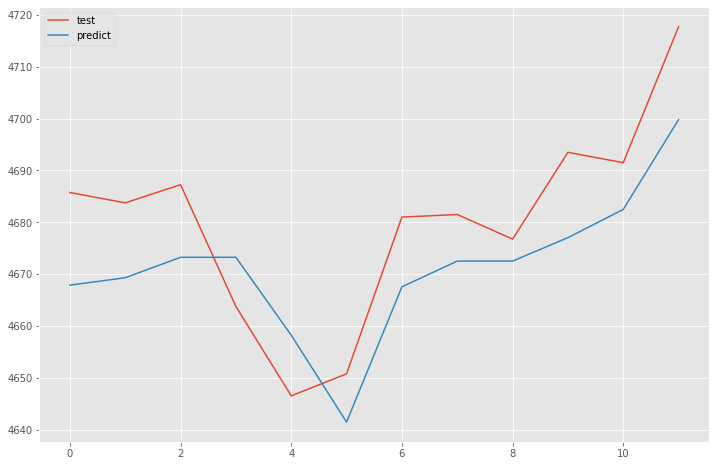

In [116]:
# best_model.save(model_path+'stfk_mod1_google_350dpi.h5')
# model = keras.models.load_model(data_path + 'best.h5')

history = [x for x in std_history]
# 
predictions = list()
std_data = array(history)
std_data = std_data.reshape((std_data.shape[0]*std_data.shape[1], std_data.shape[2]))

# rows_to_test = 36
# Смотрим тест
for i in range(len(test)):
  # predict the week
  input_x = std_data[(-n_input-len(test)+i):-len(test)+i, :]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

  yhat = model.predict(input_x, verbose=0)
  # yhat = x_scaler.inverse_transform(yhat)

  yhat = yhat[0]
  # yhat_sequence = forecast_new(model, history, n_input)
  # store the predictions
  predictions.append(yhat)
  # get real observation and add to history for predicting the next week
  # history.append(test[i, :])
# evaluate predictions days for each week

# predictions = x_scaler.inverse_transform(predictions)
predictions = array(predictions)
score, scores = evaluate_forecasts(test[:, :, 0], predictions)

# summarize scores
summarize_scores('lstm', score, scores)
predictions_data = predictions.reshape((predictions.shape[0], 1))
df_pred = pd.DataFrame(data=predictions_data,columns=["predict"])
test_data = test[:, :, 0].reshape((test[:, :, 0].shape[0], 1))
df_test = pd.DataFrame(data=test_data,columns=["test"])
df = pd.concat([df_test,df_pred],axis=1)
print(df)
df.to_excel(data_path + today + '_' + seccode + '_' + "_prognoz.xls")
df[['test', 'predict']].plot(figsize=(12, 8))
plt.show()

In [117]:
# Прогноз на будущее (находим последнюю известную строку)
history_all = [x for x in all_history]
data_all = array(history_all)
data_all = data_all.reshape((data_all.shape[0]*data_all.shape[1], data_all.shape[2]))
fact = data_all[-1:,0:1]

In [118]:
input_x = std_data[(-n_input):, :]
input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

yhat = model.predict(input_x, verbose=0)
yhat = yhat[0]

# print("Вход (input_x):{};Факт{}; Прогноз (yhat):{}".format(input_x,fact, yhat))
print("Факт вчера{}; Прогноз на сегодня(yhat):{}".format(fact, yhat))

Факт вчера[[4697.75]]; Прогноз на сегодня(yhat):[[4699.8374]]


In [119]:
input_x = std_data[(-n_input-1):-1, :]
input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

yhat = model.predict(input_x, verbose=0)
yhat = yhat[0]
# print("Вход (input_x):{};Факт{}; Прогноз (yhat):{}".format(input_x,fact, yhat))
print("Факт{}; Прогноз (yhat):{}".format(fact, yhat))

# plot scores
# days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
# pyplot.plot(days, scores, marker='o', label='lstm')
# pyplot.show()

Факт[[4697.75]]; Прогноз (yhat):[[4699.838]]


In [120]:
# import sys

# sys.exit()

# best_model.save(model_path+'stfk_mod1_google_350dpi.h5')
model = keras.models.load_model(path_best_model)

history = [x for x in std_history]
# 
predictions = list()
std_data = array(history)
std_data = std_data.reshape((std_data.shape[0]*std_data.shape[1], std_data.shape[2]))

# rows_to_test = 36
# Смотрим тест
for i in range(len(test)):
  # predict the week
  input_x = std_data[(-n_input-len(test)+i):-len(test)+i, :]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

  yhat = model.predict(input_x, verbose=0)
  # yhat = x_scaler.inverse_transform(yhat)

  yhat = yhat[0]
  # yhat_sequence = forecast_new(model, history, n_input)
  # store the predictions
  predictions.append(yhat)
  # get real observation and add to history for predicting the next week
  # history.append(test[i, :])
# evaluate predictions days for each week

# predictions = x_scaler.inverse_transform(predictions)
predictions = array(predictions)
score, scores = evaluate_forecasts(test[:, :, 0], predictions)

# summarize scores
summarize_scores('lstm', score, scores)
predictions_data = predictions.reshape((predictions.shape[0], 1))
df_pred = pd.DataFrame(data=predictions_data,columns=["predict"])
test_data = test[:, :, 0].reshape((test[:, :, 0].shape[0], 1))
df_test = pd.DataFrame(data=test_data,columns=["test"])
df = pd.concat([df_test,df_pred],axis=1)
print(df)
df.to_excel(data_path + today + '_' + seccode + "_prognoz.xls")

lstm: [12.884] 12.9
       test      predict
0   4685.75  4667.858398
1   4683.75  4669.293945
2   4687.25  4673.244141
3   4663.75  4673.245117
4   4646.50  4658.199707
5   4650.75  4641.444824
6   4681.00  4667.541016
7   4681.50  4672.508789
8   4676.75  4672.508301
9   4693.50  4677.033203
10  4691.50  4682.485840
11  4717.75  4699.837891


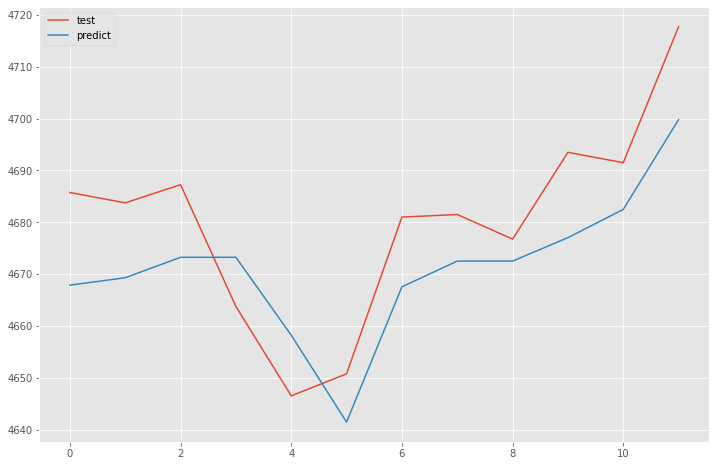

In [121]:
df[['test', 'predict']].plot(figsize=(12, 8))
plt.show()

In [122]:

# Прогноз на будущее (последняя известная строка)
history = [x for x in all_history]
data = array(history)
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
fact = data[-1:,0:1]

input_x = std_data[(-n_input-1):-1, :]
input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

yhat = model.predict(input_x, verbose=0)
yhat = yhat[0]
# print("Вход (input_x):{};Факт{}; Прогноз (yhat):{}".format(input_x,fact, yhat))
print("Факт{}; Прогноз (yhat):{}".format(fact, yhat))

# plot scores
# days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
# pyplot.plot(days, scores, marker='o', label='lstm')
# pyplot.show()

Факт[[4697.75]]; Прогноз (yhat):[[4699.838]]


In [123]:
input_x = std_data[(-n_input):, :]
input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

yhat = model.predict(input_x, verbose=0)
yhat = yhat[0]
# print("Вход (input_x):{};Факт{}; Прогноз (yhat):{}".format(input_x,fact, yhat))
print("Факт вчера{}; Прогноз на сегодня(yhat):{}".format(fact, yhat))

Факт вчера[[4697.75]]; Прогноз на сегодня(yhat):[[4699.8374]]


Low: Факт вчера[[189.1]]; Прогноз на сегодня(yhat):[[194.83665]]

Close: Факт вчера[[192.64]]; Прогноз на сегодня(yhat):[[191.94373]]

High: Факт вчера[[195.]]; Прогноз на сегодня(yhat):[[194.56512]] - весьма точно

Close Без Open: Факт вчера[[192.64]]; Прогноз на сегодня(yhat):[[204.97925]] - точно если сделать (-10)

High Без Open: Факт вчера[[195.]]; Прогноз на сегодня(yhat):[[197.63686]] 
lstm: [7.108] 7.1







In [124]:
# best_model.save(model_path+'stfk_mod1_google_350dpi.h5')
# model = keras.models.load_model(data_path + 'best.h5')

history = [x for x in std_history]
# 
predictions = list()
std_data = array(history)
std_data = std_data.reshape((std_data.shape[0]*std_data.shape[1], std_data.shape[2]))

# rows_to_test = 36
# Смотрим тест

for i in range(len(train)):
  # predict the week
  input_x = std_data[(-n_input-len(train)+i):-len(train)+i, :]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))

  yhat = model.predict(input_x, verbose=0)
  # yhat = x_scaler.inverse_transform(yhat)

  yhat = yhat[0]
  # yhat_sequence = forecast_new(model, history, n_input)
  # store the predictions
  predictions.append(yhat)
  # get real observation and add to history for predicting the next week
  # history.append(test[i, :])
# evaluate predictions days for each week

# predictions = x_scaler.inverse_transform(predictions)
predictions = array(predictions)
score, scores = evaluate_forecasts(train[:, :, 0], predictions)

# summarize scores
summarize_scores('lstm', score, scores)

predictions_data = predictions.reshape((predictions.shape[0], 1))
df_pred = pd.DataFrame(data=predictions_data,columns=["predict"])
test_data = train[:, :, 0].reshape((train[:, :, 0].shape[0], 1))
df_test = pd.DataFrame(data=test_data,columns=["test"])




lstm: [57.107] 57.1


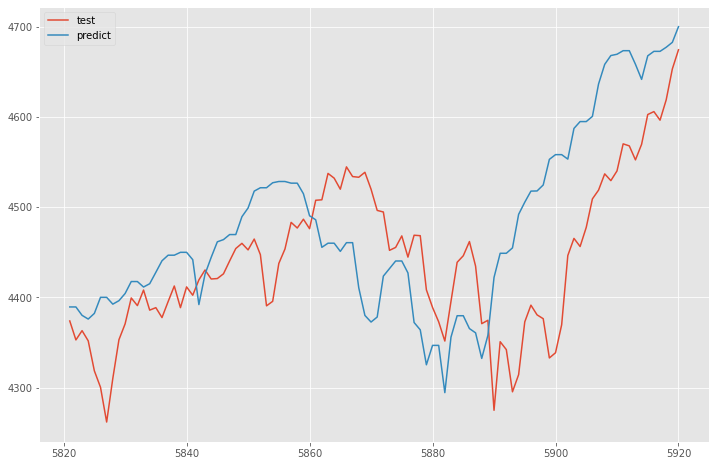

In [125]:
df = pd.concat([df_test,df_pred],axis=1)
df = df[-100:]
df[['test', 'predict']].plot(figsize=(12, 8))
plt.show()

In [126]:
# Рисует основной график
def draw_candles(candles):
    # Добавим на график несколько ЕМА-средних
    # candles['ema100'] = pd.Series.ewm(candles['<CLOSE>'], span=100).mean()
    # candles['ema50'] = pd.Series.ewm(candles['<CLOSE>'], span=50).mean()
    # candles['ema20'] = pd.Series.ewm(candles['<CLOSE>'], span=20).mean()
    plt.style.use('ggplot')  # 'seaborn-paper'
    # Отображаем график по цене закрытия свечей и ЕМА-шки
    fig = candles.plot(y=['test', 'predict'], figsize=(25, 16))
    # Добавляем заголовок
    fig.set_title('График ' + seccode)
    # Рисуем шкалу с датами
    PlotDatesX(fig, candles)

# Определяет начальную и конечную позицию Х (по индексу свечей) для заданной даты. Пригодится при отрисовке ценовых уровней
def DateX(date, candles):
    # Цикл по датам в свечах, результат - список X-координат, соответствующих заданной дате
    xpositions = [index for index, row in candles.iterrows() if row['Date'].date() == date]
    # Возвращает список - пару начальная координата Х и конечная координата Х для заданной даты на графике
    if xpositions == []:
        return [len(candles) - 1, len(candles)]  # На случай если за текущую дату нет еще свечей
    return [xpositions[0], xpositions[-1]]


# Рисует метки дат на оси Х
def PlotDatesX(fig, candles):
    # Составляем список дат (только уникальные даты) из столбца DT. Они будут метками на оси Х. Сортировка по датам
    # обязательна, т.к. при создании множества(set) даже из отсортированного списка, множество может не сохранить порядок списка
    dates = sorted(set(map(lambda dt: datetime.date(dt), candles['Date'])))
    # Создаем список координат Х для каждой метки (даты). Нам нужна только первая позиция - [0].
    xlabel = [DateX(d, candles)[0] for d in dates]
    # Рисуем ось Х, разделенную по датам
    fig.set_xticklabels(dates)
    fig.set_xticks(xlabel)
    return dates, xlabel

In [127]:
# print(df)

In [128]:
# draw_candles(df)